In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('../bids.csv')
df.punk_id = df.punk_id.astype(int)
df.drop('Unnamed: 0',axis=1,inplace=True)
df['Txn'] = df['Txn'].astype('datetime64')

In [52]:
bids = df[(df['Type']=='Bid') | (df['Type']=='Bid Withdrawn')]
bids

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars
0,250Ξ ($1.03M),0x983ace,NaN,2021-05-10,Bid Withdrawn,0,250.0,1030000.0
1,"250Ξ ($537,615)",0x983ace,NaN,2021-04-11,Bid,0,250.0,537615.0
2,"100Ξ ($160,973)",0xd7510a,NaN,2021-03-03,Bid Withdrawn,0,100.0,160973.0
3,"100Ξ ($188,897)",0xd7510a,NaN,2021-02-20,Bid,0,100.0,188897.0
4,"69Ξ ($25,532)",natealex,NaN,2020-09-16,Bid Withdrawn,0,69.0,25532.0
...,...,...,...,...,...,...,...,...
92816,0.10Ξ ($64),Kenney,NaN,2018-04-23,Bid,9980,0.1,64.0
92819,0.10Ξ ($21),0x6611fe,NaN,2017-07-10,Bid Withdrawn,9984,0.1,21.0
92820,0.10Ξ ($28),0x6611fe,NaN,2017-07-02,Bid,9984,0.1,28.0
92821,0.10Ξ ($9),0x95,NaN,2018-12-11,Bid Withdrawn,9985,0.1,9.0


In [51]:
bids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34325 entries, 0 to 92822
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Amount           34325 non-null  object        
 1   From             34325 non-null  object        
 2   To               0 non-null      object        
 3   Txn              34325 non-null  datetime64[ns]
 4   Type             34325 non-null  object        
 5   punk_id          34325 non-null  int64         
 6   amount_ethereum  34325 non-null  float64       
 7   amount_dollars   34325 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.4+ MB


In [42]:
punks = pd.read_csv('raw_punks.csv')
punks.drop('Unnamed: 0',axis=1,inplace=True)

In [43]:
punks

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,1,Male,4352,Dark,2,"Mohawk,Smile",0,NaN
2,2,Female,8090,Light,1,Wild Hair,0,NaN
3,3,Male,7896,Dark,3,"Nerd Glasses,Pipe,Wild Hair",0,NaN
4,4,Male,7332,Mid,4,"Big Shades,Earring,Goat,Wild Hair",0,NaN
...,...,...,...,...,...,...,...,...
9995,9995,Female,2466,Albino,2,"Purple Eye Shadow,Straight Hair Dark",0,NaN
9996,9996,Male,4323,Light,4,"Cigarette,Crazy Hair,Earring,Smile",0,NaN
9997,9997,Zombie,498,Zombie,2,"Cap Forward,Front Beard",0,NaN
9998,9998,Female,1271,Mid,3,"Black Lipstick,Clown Eyes Green,Wild White Hair",0,NaN


In [90]:
aggregated_df = bids.merge(punks, how='left',left_on='punk_id',right_on='id',left_index=False, right_index=False, sort=False)
aggregated_df.head()

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,250Ξ ($1.03M),0x983ace,NaN,2021-05-10,Bid Withdrawn,0,250.0,1030000.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,"250Ξ ($537,615)",0x983ace,NaN,2021-04-11,Bid,0,250.0,537615.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
2,"100Ξ ($160,973)",0xd7510a,NaN,2021-03-03,Bid Withdrawn,0,100.0,160973.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
3,"100Ξ ($188,897)",0xd7510a,NaN,2021-02-20,Bid,0,100.0,188897.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
4,"69Ξ ($25,532)",natealex,NaN,2020-09-16,Bid Withdrawn,0,69.0,25532.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring


In [91]:
df_agg = aggregated_df[['From','To','Txn','punk_id','amount_ethereum','types','skin']]

In [ ]:
g = sns.pairplot(df_agg, hue="types", palette="Set2", diag_kind="kde", height=2.5)

In [ ]:
sns.boxplot(x="types", y="amount_ethereum", data=df_agg, whis=np.inf)
sns.swarmplot(x="types", y="amount_ethereum", data=df_agg, color=".2")

In [ ]:
df_agg.groupby('skin')['amount_ethereum'].mean()

<AxesSubplot:xlabel='amount_ethereum'>

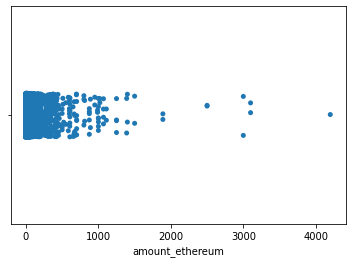

In [73]:
 sns.stripplot(x=df_agg["amount_ethereum"])

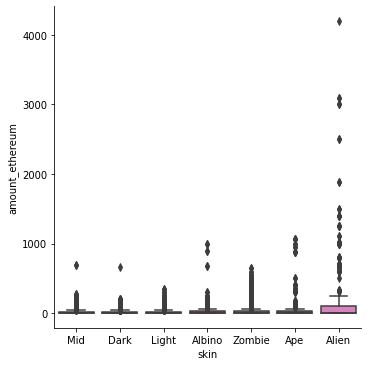

In [70]:
sns.catplot(x='skin',y='amount_ethereum',data=df_agg,kind='box')
plt.show()